# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,KFold,cross_val_score


import warnings
warnings.filterwarnings('ignore')


d:\CodingSetup\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Loading Datasets

In [2]:

train = pd.read_csv(r'Data/train.csv')
test = pd.read_csv(r'Data/test.csv')
sample = pd.read_csv(r'Data/sample_submission.csv')

In [3]:
train.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,71418865,5100,36,0.0916,162.56,B,2016-02-01T00:00,credit_card,1256.87,3843.13,705.95,0.0,2018-06-01T00:00,2018-07-01T00:00,60,CURRENT,'Lending Club'
1,44116029,11775,60,0.1786,298.12,D,2015-03-01T00:00,debt_consolidation,0.00,2356.98,2687.69,0.0,2016-09-01T00:00,2016-10-01T00:00,698,CHARGEOFF,'Lending Club'
2,30245478,20000,36,0.0839,630.34,A,2014-10-01T00:00,debt_consolidation,0.00,20000.00,2668.60,0.0,2017-10-01T00:00,2017-11-01T00:00,0,COMPLETED,'Lending Club'
3,71673111,6000,36,0.0649,183.87,A,2016-02-01T00:00,debt_consolidation,0.00,6000.00,346.34,0.0,2017-02-01T00:00,2017-03-01T00:00,0,COMPLETED,'Lending Club'
4,15481006,22500,36,0.0662,690.84,A,2014-05-01T00:00,debt_consolidation,0.00,22500.00,1240.16,0.0,2015-12-01T00:00,2016-01-01T00:00,0,COMPLETED,'Lending Club'


In [4]:
print('No. of rows in the  dataset {}.'.format(train.shape[0]))
print('No. of columns in the dataset {}.'.format(train.shape[1]))
print('Shape :',train.shape)

No. of rows in the  dataset 943695.
No. of columns in the dataset 17.
Shape : (943695, 17)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943695 entries, 0 to 943694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_number              943695 non-null  int64  
 1   amount_borrowed          943695 non-null  int64  
 2   term                     943695 non-null  int64  
 3   borrower_rate            943695 non-null  float64
 4   installment              943695 non-null  float64
 5   grade                    943695 non-null  object 
 6   origination_date         943695 non-null  object 
 7   listing_title            943695 non-null  object 
 8   principal_balance        943695 non-null  float64
 9   principal_paid           943695 non-null  float64
 10  interest_paid            943695 non-null  float64
 11  late_fees_paid           943695 non-null  float64
 12  last_payment_date        943695 non-null  object 
 13  next_payment_due_date    943695 non-null  object 
 14  days

* Statistics of numerical features

In [6]:
num_var = train.describe().columns
train.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,days_past_due
count,9.436950e+05,943695.000000,943695.000000,943695.000000,943695.000000,943695.000000,943695.000000,943695.000000,9.436950e+05,943695.000000
mean,4.195840e+07,14999.131208,43.084628,0.131430,444.594365,1436.999439,11848.230748,2980.574012,1.425244e+00,140.118332
std,2.569335e+07,8531.291105,10.947111,0.045034,248.494920,3616.262480,8129.398374,2986.744696,1.042645e+01,335.127080
min,5.612100e+04,1000.000000,36.000000,0.053200,4.930000,0.000000,0.000000,0.000000,-9.500000e-09,0.000000
25%,1.540114e+07,8275.000000,36.000000,0.097500,264.000000,0.000000,5684.245000,1012.320000,0.000000e+00,0.000000
50%,4.531446e+07,13475.000000,36.000000,0.128800,388.060000,0.000000,10000.000000,1977.780000,0.000000e+00,0.000000
75%,6.527224e+07,20000.000000,60.000000,0.159900,583.550000,0.000000,16000.000000,3879.830000,0.000000e+00,60.000000
max,8.439337e+07,40000.000000,60.000000,0.309900,1569.110000,30667.440000,40000.000000,27884.800000,1.188830e+03,2402.000000


* Statistics of categorical features

In [7]:
cat_var = train.describe(include='object').columns
train.describe(include='object')


,grade,origination_date,listing_title,last_payment_date,next_payment_due_date,loan_status_description,data_source
count,943695,943695,943695,943695,943695,943695,943695
unique,7,54,14,79,79,4,1
top,B,2016-03-01T00:00,debt_consolidation,2018-06-01T00:00,2018-07-01T00:00,COMPLETED,'Lending Club'
freq,273918,55813,557957,151488,151488,574023,943695


In [8]:
train.duplicated().sum()

0

In [9]:
train.isnull().sum()

loan_number                0
amount_borrowed            0
term                       0
borrower_rate              0
installment                0
grade                      0
origination_date           0
listing_title              0
principal_balance          0
principal_paid             0
interest_paid              0
late_fees_paid             0
last_payment_date          0
next_payment_due_date      0
days_past_due              0
loan_status_description    0
data_source                0
dtype: int64

* Data doesn't have any Duplicate or Null Values

## Data Preprocessing

* Label Encoding for target feature

In [10]:
le = LabelEncoder()
enc = le.fit_transform(train['loan_status_description'])
integerMapping=dict(zip(enc,train['loan_status_description']))
train['loan_status_description'] = enc

print(integerMapping)
train.head()

{2: 'CURRENT', 0: 'CHARGEOFF', 1: 'COMPLETED', 3: 'DEFAULTED'}


,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,71418865,5100,36,0.0916,162.56,B,2016-02-01T00:00,credit_card,1256.87,3843.13,705.95,0.0,2018-06-01T00:00,2018-07-01T00:00,60,2,'Lending Club'
1,44116029,11775,60,0.1786,298.12,D,2015-03-01T00:00,debt_consolidation,0.00,2356.98,2687.69,0.0,2016-09-01T00:00,2016-10-01T00:00,698,0,'Lending Club'
2,30245478,20000,36,0.0839,630.34,A,2014-10-01T00:00,debt_consolidation,0.00,20000.00,2668.60,0.0,2017-10-01T00:00,2017-11-01T00:00,0,1,'Lending Club'
3,71673111,6000,36,0.0649,183.87,A,2016-02-01T00:00,debt_consolidation,0.00,6000.00,346.34,0.0,2017-02-01T00:00,2017-03-01T00:00,0,1,'Lending Club'
4,15481006,22500,36,0.0662,690.84,A,2014-05-01T00:00,debt_consolidation,0.00,22500.00,1240.16,0.0,2015-12-01T00:00,2016-01-01T00:00,0,1,'Lending Club'


In [16]:
train.nunique()

loan_number                943695
amount_borrowed              1447
term                            2
borrower_rate                 275
installment                 69251
grade                           7
origination_date               54
listing_title                  14
principal_balance          125496
principal_paid             242360
interest_paid              466263
late_fees_paid               9289
last_payment_date              79
next_payment_due_date          79
days_past_due                  80
loan_status_description         4
data_source                     1
dtype: int64

* One Hot Encoding categorical features for better model performance

In [11]:
train_grade_df = pd.DataFrame(train, columns=['grade'])
train_listing_df = pd.DataFrame(train, columns=['listing_title'])
test_grade_df = pd.DataFrame(test, columns=['grade'])
test_listing_df = pd.DataFrame(test, columns=['listing_title'])



train_dum_df = pd.get_dummies(train_grade_df, columns=["grade"], prefix=["grade"] )
train_dum1_df = pd.get_dummies(train_listing_df, columns=["listing_title"], prefix=["list_title"])
test_dum_df = pd.get_dummies(test_grade_df, columns=["grade"], prefix=["grade"] )
test_dum1_df = pd.get_dummies(test_listing_df, columns=["listing_title"], prefix=["list_title"])



train_ohe = train.join(train_dum_df).join(train_dum1_df)
test_ohe = test.join(test_dum_df).join(test_dum1_df)
train_ohe.drop(columns=['grade','listing_title','list_title_educational'],inplace=True)
test_ohe.drop(columns=['grade','listing_title','origination_date','next_payment_due_date','last_payment_date','data_source'],inplace=True)


## Model Building

* Splitting Data into Training and Testing features 

In [12]:
X= train_ohe.drop(columns=['loan_status_description','origination_date','next_payment_due_date','last_payment_date','data_source'])
y = train_ohe['loan_status_description']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


* Choosing the best classifier from multiple classifiers using KFold Validation

---------- LR ----------


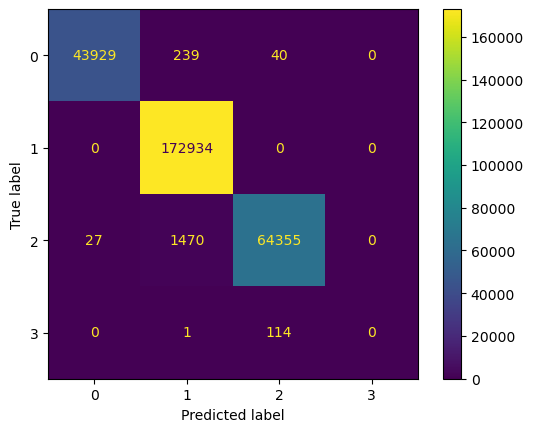

accuracy: 0.9933205938348834
LR: Avg_Accuracy: 0.993249932635569, Std:3.178995619040892e-05
---------- RFC ----------


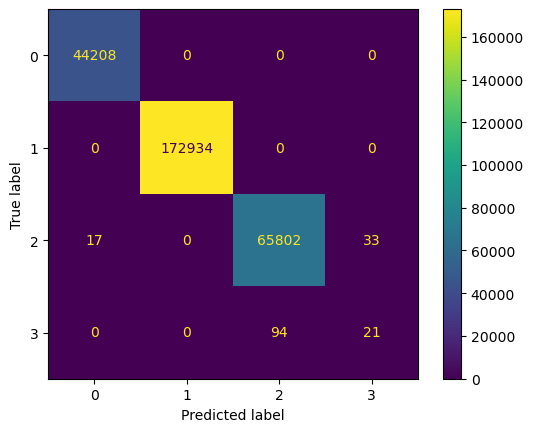

accuracy: 0.9994913619842534
RFC: Avg_Accuracy: 0.9994277807885725, Std:0.0
---------- KNN ----------


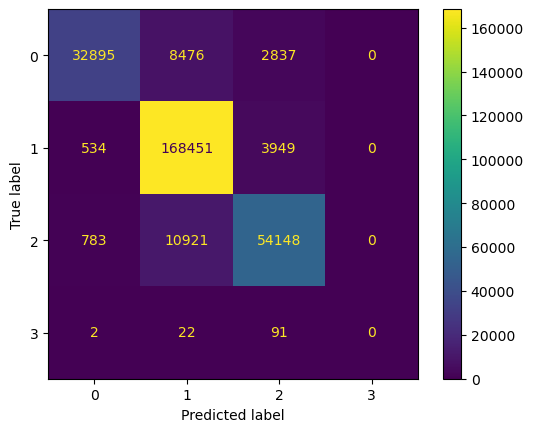

accuracy: 0.9024580638552643
KNN: Avg_Accuracy: 0.8574871402058173, Std:3.633137850334034e-05
---------- CART ----------


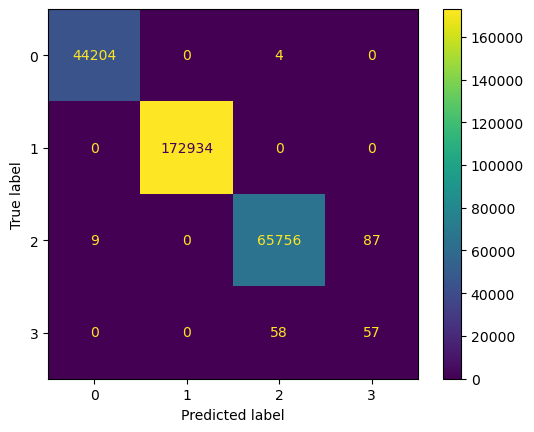

accuracy: 0.9994419110660558
CART: Avg_Accuracy: 0.9994308084034478, Std:6.055229750556723e-06
---------- NB ----------


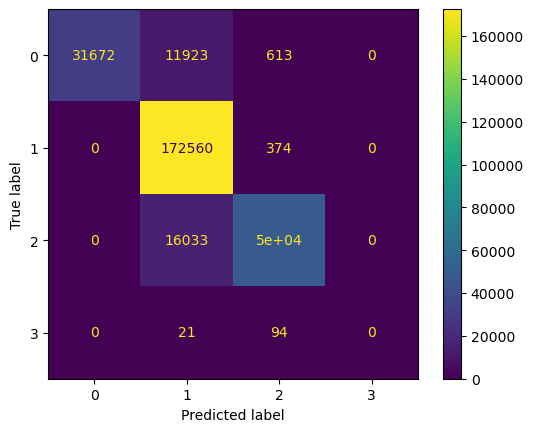

accuracy: 0.8973610870724703
NB: Avg_Accuracy: 0.8959439043515909, Std:0.00030578910240303125
---------- LGBM ----------


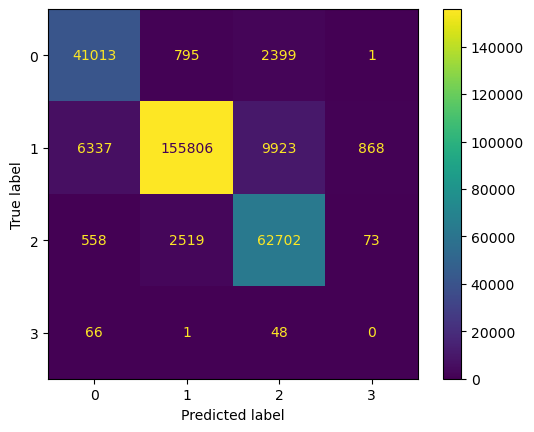

accuracy: 0.9166822672539552
LGBM: Avg_Accuracy: 0.633277120617149, Std:0.2324178835155453
[22:11:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglo

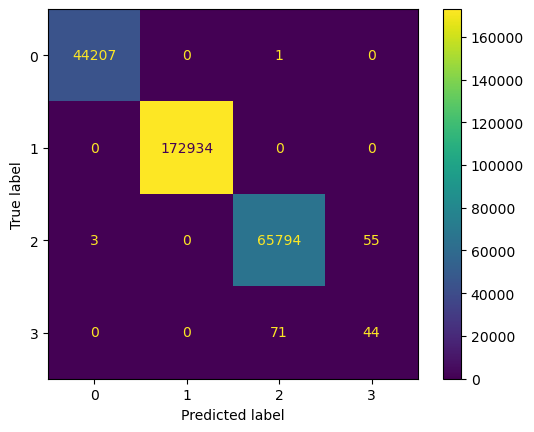

accuracy: 0.999540812902451
XGB: Avg_Accuracy: 0.9994883330860782, Std:6.055229750556723e-06


In [206]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
models.append(('LGBM', LGBMClassifier()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=2)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	
	model.fit(X_train,y_train)
	pred = model.predict(X_test)
	print(10*'-',name,10*'-')
	cm = confusion_matrix(y_test,pred,labels=model.classes_)
	cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
	cmd.plot()
	plt.show()
	print('accuracy:',accuracy_score(y_test,pred))
	results.append(cv_results)
	names.append(name)
	avg = "{}: Avg_Accuracy: {}, Std:{}".format (name, cv_results.mean(), cv_results.std())
	print(avg)

* We can observe from the above results, RandomForestClassifier and XGBoost performs the best among all the classifiers. We will be training our model on XGBoost !!

## Training the Best Model

In [14]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_final_pred = xgb.predict(test_ohe)
pred = xgb.predict(X_test)
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

pred

[22:20:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44208
           1       1.00      1.00      1.00    172934
           2       1.00      1.00      1.00     65852
           3       0.44      0.38      0.41       115

    accuracy                           1.00    283109
   macro avg       0.86      0.85      0.85    283109
weighted avg       1.00      1.00      1.00    283109

0.999540812902451


array([1, 0, 1, ..., 0, 2, 2])

## Creating Submission File

In [15]:
sample['loan_number']= test_ohe['loan_number']
sample['loan_status_description'] = xgb_final_pred
sample['loan_status_description'] = sample['loan_status_description'].map(integerMapping) 
sample.head()

,loan_number,loan_status_description
0,1582834,CURRENT
1,75679675,CURRENT
2,6178775,COMPLETED
3,55667318,CHARGEOFF
4,60315522,COMPLETED


In [16]:
sample.to_csv('Submission.csv',index=False)